In [617]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline


In [618]:
df_genres = pd.read_csv("genres.csv",header=None,names=['class','name'])
df_train  = pd.read_csv("train.csv",header=None,names=["file",'class'])
df_test   = pd.read_csv("test.csv",header=None,names=["file"])

In [619]:
test_files = glob.glob("test/*")
train_files = glob.glob("train/*")

Text(0,0.5,'Frequency Number')

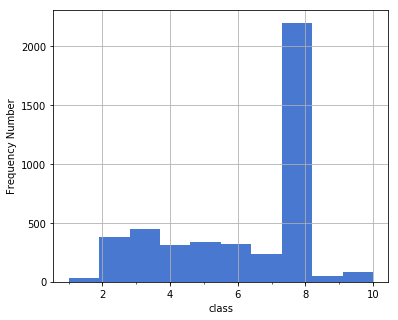

In [620]:
f,ax = plt.subplots(figsize=(6,5))
classes = df_train['class'].unique()
df_train['class'].hist(ax=ax,bins=len(classes))
ax.set_xticks(sorted(classes),minor =True)
ax.set_xlabel("class")
ax.set_ylabel("Frequency Number")

In [621]:
df_genres

,class,name
0,1,Cải Lương
1,2,Nhạc Cách Mạng
2,3,Nhạc Dân Ca - Quê Hương
3,4,Nhạc Dance
4,5,Nhạc Không Lời
5,6,Nhạc Thiếu Nhi
6,7,Nhạc Trịnh
7,8,Nhạc Trữ Tình
8,9,Rap Việt
9,10,Rock Việt


In [622]:
sum(df_train['class']==10)

80

In [623]:
# We'll need numpy for some mathematical operations
from __future__ import print_function
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

# and IPython.display for audio output
import IPython.display

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

In [624]:
class_sample={}
for i in range(1,11,1):
    class_sample[i] = df_train[df_train['class']==i].iloc[:10,0].values

In [625]:
import IPython.display as ipd
ipd.Audio('test/2097277076192865224.mp3') # load a local WAV file

In [626]:
df_genres

,class,name
0,1,Cải Lương
1,2,Nhạc Cách Mạng
2,3,Nhạc Dân Ca - Quê Hương
3,4,Nhạc Dance
4,5,Nhạc Không Lời
5,6,Nhạc Thiếu Nhi
6,7,Nhạc Trịnh
7,8,Nhạc Trữ Tình
8,9,Rap Việt
9,10,Rock Việt


In [627]:
def normalize(arr):
    return (arr-np.min(arr))/(np.max(arr) - np.min(arr))

In [628]:
y, sr = librosa.load('test/2018076709319118483.mp3',sr=None)

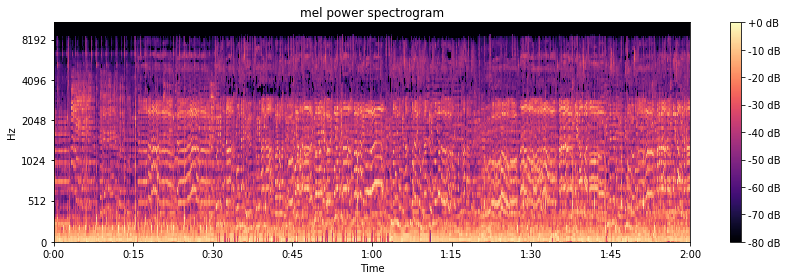

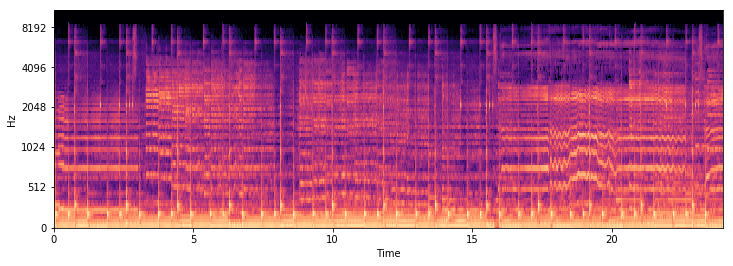

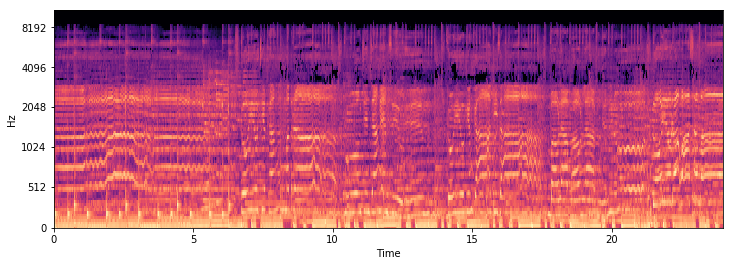

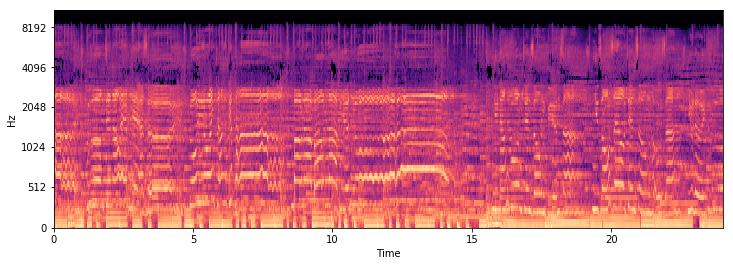

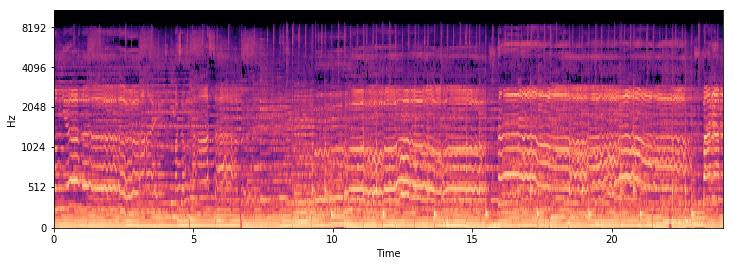

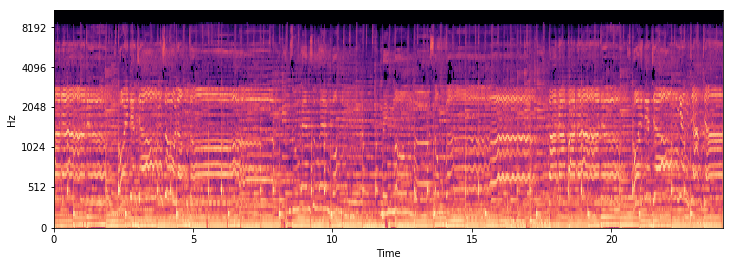

In [629]:
num = 5
sample_len = 3000
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=100)
# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel',vmin=-80, vmax=0)

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

num_first_components = [10, sample_len/2, sample_len,log_S.shape[-1]-sample_len*3/2 ,log_S.shape[-1]-sample_len-10]

for i in range(num):
    # Make a new figure
    plt.figure(figsize=(12,4))

    # Display the spectrogram on a mel scale
    # sample rate and hop length parameters are used to render the time axis
    librosa.display.specshow(log_S[:,i*log_S.shape[-1]/num:(i+1)*log_S.shape[-1]/num], sr=sr, x_axis='time', y_axis='mel',vmin=-80, vmax=0)

    # Put a descriptive title on the plot
    #plt.title('mel power spectrogram')

    # draw a color bar
    #plt.colorbar(format='%+02.0f dB')

    # Make the figure layout compact
    #plt.tight_layout()

In [630]:
y_harmonic, y_percussive = librosa.effects.hpss(y)
# What do the spectrograms look like?
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S_harmonic   = librosa.feature.melspectrogram(y_harmonic, sr=sr)
S_percussive = librosa.feature.melspectrogram(y_percussive, sr=sr)

# Convert to log scale (dB). We'll use the peak power as reference.
log_Sh = librosa.power_to_db(S_harmonic, ref=np.max)
log_Sp = librosa.power_to_db(S_percussive, ref=np.max)

In [639]:
gg = np.load("train/harmonic_1001684131607489553.mp3_8.npy")

In [640]:
librosa.power_to_db(gg, ref=np.max)

array([-80., -80., -80., ..., -80., -80., -80.], dtype=float32)

In [631]:
remain_components = 13
mfcc        = librosa.feature.mfcc(S=log_S, n_mfcc=remain_components)
delta_mfcc  = normalize(librosa.feature.delta(mfcc))
delta2_mfcc = normalize(librosa.feature.delta(mfcc, order=2))

# For future use, we'll stack these together into one matrix
M = np.vstack([normalize(mfcc), delta_mfcc, delta2_mfcc])

KeyboardInterrupt: 

In [ ]:
# Let's pad on the first and second deltas while we're at it
# Next, we'll extract the top 13 Mel-frequency cepstral coefficients (MFCCs)
remain_components = 6
mfcc        = librosa.feature.mfcc(S=log_S, n_mfcc=remain_components)
delta_mfcc  = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)
delta3_mfcc = librosa.feature.delta(mfcc, order=3)
# For future use, we'll stack these together into one matrix
M = np.vstack([mfcc, delta_mfcc, delta2_mfcc])
# How do they look?  We'll show each in its own subplot
plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
librosa.display.specshow(mfcc,vmin=-500, vmax=100,sr=sr)
plt.ylabel('MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(delta_mfcc,vmin=-10, vmax=15,sr=sr)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time',vmin=-8, vmax=8)
plt.ylabel('MFCC-$\Delta^2$')
plt.colorbar()

plt.tight_layout()
num = 5
for i in range(num):
    # How do they look?  We'll show each in its own subplot
    plt.figure(figsize=(12, 6))

    plt.subplot(3,1,1)
    librosa.display.specshow(mfcc[:,i*mfcc.shape[-1]/num:(i+1)*mfcc.shape[-1]/num],vmin=-500, vmax=100,sr=sr)
    plt.ylabel('MFCC')
    plt.colorbar()

    plt.subplot(3,1,2)
    librosa.display.specshow(delta_mfcc[:,i*delta_mfcc.shape[-1]/num:(i+1)*delta_mfcc.shape[-1]/num],vmin=-10, vmax=15,sr=sr)
    plt.ylabel('MFCC-$\Delta$')
    plt.colorbar()

    plt.subplot(3,1,3)
    librosa.display.specshow(delta2_mfcc[:,i*delta2_mfcc.shape[-1]/num:(i+1)*delta2_mfcc.shape[-1]/num], sr=sr, x_axis='time',vmin=-8, vmax=8)
    plt.ylabel('MFCC-$\Delta^2$')
    plt.colorbar()

    plt.tight_layout()

In [ ]:
# Now, let's run the beat tracker.
# We'll use the percussive component for this part
p_tempo, p_beats = librosa.beat.beat_track(y=y_percussive, sr=sr)

plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Let's draw transparent lines over the beat frames
plt.vlines(librosa.frames_to_time(p_beats,sr=sr),
           1, 0.25 * sr,
           colors='w', linestyles='-', linewidth=2, alpha=0.5)
plt.title('beat tracker using percussive component')
plt.axis('tight')

plt.colorbar(format='%+02.0f dB')

plt.tight_layout()


In [ ]:
print('Estimated tempo:        %.2f BPM' % p_tempo)

print('First 5 beat frames:   ', p_beats[:5])

# Frame numbers are great and all, but when do those beats occur?
print('First 5 beat times:    ', librosa.frames_to_time(p_beats[:5], sr=sr))

# We could also get frame numbers from times by librosa.time_to_frames()

In [ ]:
# feature.sync will summarize each beat event by the mean feature vector within that beat
M_std = np.vstack([normalize(mfcc), normalize(delta_mfcc), normalize(delta2_mfcc)])

M_sync = librosa.util.sync(M_std, p_beats)

print ("The dimension different: M_sync = ", M_sync.shape, " and M = ", M.shape)

plt.figure(figsize=(10,8))

# Let's plot the original and beat-synchronous features against each other
plt.subplot(2,1,1)
librosa.display.specshow(M_std,sr=sr,vmin=0, vmax=1,x_axis='time')
plt.title('MFCC-$\Delta$-$\Delta^2$')

# We can also use pyplot *ticks directly
# Let's mark off the raw MFCC and the delta features
plt.yticks(np.arange(0, M.shape[0], remain_components), ['MFCC', '$\Delta$', '$\Delta^2$'])

plt.colorbar()

plt.subplot(2,1,2)
# librosa can generate axis ticks from arbitrary timestamps and beat events also
librosa.display.specshow(M_sync, x_axis='time',vmin=0, vmax=1,sr=sr,
                         x_coords=librosa.frames_to_time(librosa.util.fix_frames(p_beats),sr=sr))

plt.yticks(np.arange(0, M_sync.shape[0], remain_components), ['MFCC', '$\Delta$', '$\Delta^2$'])             
plt.title('Beat-synchronous MFCC-$\Delta$-$\Delta^2$')
plt.colorbar()

plt.tight_layout()

In [ ]:
y, sr = librosa.load('test/3822944827912013472.mp3',sr=44100)

y_harmonic, y_percussive = librosa.effects.hpss(y)

p_tempo, p_beats = librosa.beat.beat_track(y=y_percussive, sr=sr)


In [ ]:
C = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)


In [ ]:
# Beat synchronization is flexible.
# Instead of computing the mean delta-MFCC within each beat, let's do beat-synchronous chroma
# We can replace the mean with any statistical aggregation function, such as min, max, or median.

C_sync_median = librosa.util.sync(C, p_beats, aggregate=np.median)
C_sync_min = librosa.util.sync(C, p_beats, aggregate=np.min)
C_sync_max = librosa.util.sync(C, p_beats, aggregate=np.max)
C_sync_mean = librosa.util.sync(C, p_beats, aggregate=np.mean)
print ("The dimension different: C_sync_median = ", C_sync_median.shape, " and C = ", C.shape)
plt.figure(figsize=(12,3*5))

plt.subplot(5, 1, 1)
librosa.display.specshow(C, sr=sr, y_axis='chroma', vmin=0.0, vmax=1.0, x_axis='time')

plt.title('Chroma')
plt.colorbar()

plt.subplot(5, 1, 2)
librosa.display.specshow(C_sync_median, y_axis='chroma', vmin=0.0, vmax=1.0, x_axis='time', sr=sr,
                         x_coords=librosa.frames_to_time(librosa.util.fix_frames(p_beats),sr=sr))


plt.title('Beat-synchronous Chroma (median aggregation)')
plt.colorbar()
plt.subplot(5, 1, 3)
librosa.display.specshow(C_sync_mean, y_axis='chroma', vmin=0.0, vmax=1.0, x_axis='time', sr=sr,
                         x_coords=librosa.frames_to_time(librosa.util.fix_frames(p_beats),sr=sr))


plt.title('Beat-synchronous Chroma (mean aggregation)')
plt.colorbar()

plt.tight_layout()

In [ ]:
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=100)
# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)
S_sync_median = librosa.util.sync(C, p_beats, aggregate=np.median)

In [ ]:
S_sync_median.shape

In [ ]:
plt.figure(figsize=(25,5))


img = librosa.display.specshow(log_S, sr=sr)



In [ ]:
def normalize(arr,min_,max_):
    return (arr-min_)/(max_ - min_)


In [ ]:
from skimage.transform import resize
bottle_resized = resize(cm.gist_gray(normalize(log_S))*255, (224, 224))

In [ ]:
from PIL import Image,ImageEnhance
from matplotlib import cm
im = Image.fromarray(np.uint8(cm.seismic(normalize(log_S,-80,0))*255))

im = Image.fromarray(np.asarray(im.resize((224*5, 224),Image.ANTIALIAS)))


In [ ]:
y = np.load("train/mfcc_sync_7007465110720020863.mp3_8.npy")
im = Image.fromarray(np.uint8(cm.Spectral(normalize(y,-600,100))*255))
length = 300*2
dup    = 20
arr    = np.asarray(im.resize((length, 12*dup),Image.ANTIALIAS))[:,:,:3]
block_length = length/(5)
fro_ = np.array(range(0,length,block_length//2)[:-1])
to_  = fro_+ block_length
arrs = [arr[:,fro_[i]:to_[i]]  for i in range(len(fro_))  ]

In [ ]:
Image.fromarray(arr)

In [ ]:
y_harmonic